<a href="https://colab.research.google.com/github/YounSooKimTech/CDDS_2023/blob/main/payment_type_ridership.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd

df = pd.read_csv("/content/Fare_Card_History_for_Metropolitan_Transportation_Authority__MTA___Beginning_2010.csv")

In [48]:
import pandas as pd

df['From Date'] = pd.to_datetime(df['From Date'])

df['To Date'] = pd.to_datetime(df['To Date'])

# Now, the 'From Date' column contains datetime objects


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250874 entries, 0 to 250873
Data columns (total 26 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   From Date                                    250874 non-null  datetime64[ns]
 1   To Date                                      250874 non-null  datetime64[ns]
 2   Remote Station ID                            250874 non-null  object        
 3   Station                                      250874 non-null  object        
 4   Full Fare                                    250874 non-null  int64         
 5   Senior Citizen / Disabled                    250874 non-null  int64         
 6   7 Day ADA Farecard Access System Unlimited   250874 non-null  int64         
 7   30 Day ADA Farecard Access System Unlimited  250874 non-null  int64         
 8   Joint Rail Road Ticket                       250874 non-null  in

In [70]:
df["Duration"] = df["To Date"] - df["From Date"]

df[df["Duration"] == "-6 days"]

,From Date,To Date,Remote Station ID,Station,Full Fare,Senior Citizen / Disabled,7 Day ADA Farecard Access System Unlimited,30 Day ADA Farecard Access System Unlimited,Joint Rail Road Ticket,7 Day Unlimited,...,Rail Road Unlimited No Trade,Transit Check Metrocard Annual Metrocard,Mail and Ride Easy Pay Express,Mail and Ride Unlimited,Path 2 Trip,Airtran Full Fare,Airtran 30 Day,Airtran 10 Trip,Airtran Monthly,Duration
0,2021-08-06,2021-07-31,R001,WHITEHALL STREET,27946,1824,242,376,8,11958,...,162,0,717,0,0,0,327,0,0,-6 days
1,2021-08-06,2021-07-31,R003,CYPRESS HILLS,1323,134,3,13,0,817,...,19,0,11,0,0,0,70,0,0,-6 days
2,2021-08-06,2021-07-31,R004,75TH STREET & ELDERTS LANE,4241,321,15,43,0,2029,...,31,0,28,0,0,0,301,0,0,-6 days
3,2021-08-06,2021-07-31,R005,85TH STREET & FOREST PKWAY,4418,389,29,30,1,1999,...,25,0,40,0,0,0,111,0,0,-6 days
4,2021-08-06,2021-07-31,R006,WOODHAVEN BOULEVARD,4193,315,27,55,0,2946,...,14,0,25,0,0,0,148,0,0,-6 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,2020-11-06,2020-10-31,R571,86TH STREET - 2 AVENUE,21589,1837,84,265,4,5502,...,363,0,188,0,0,0,609,0,0,-6 days
3326,2020-11-06,2020-10-31,R572,96TH STREET - 2 AVENUE,15368,1611,104,252,7,4768,...,259,0,107,0,0,0,914,0,0,-6 days
3327,2020-11-06,2020-10-31,R573,SBS-Q52/53 @ LIVINGSTON PLAZA,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-6 days
3328,2020-11-06,2020-10-31,R574,SBS-B82 @ LIVINGSTON PLAZA,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-6 days


In [51]:
df.groupby(["From Date", "To Date"]).sum().sort_index()

<ipython-input-51-c0ec8378ecc5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["From Date", "To Date"]).sum().sort_index()


,,Full Fare,Senior Citizen / Disabled,7 Day ADA Farecard Access System Unlimited,30 Day ADA Farecard Access System Unlimited,Joint Rail Road Ticket,7 Day Unlimited,30 Day Unlimited,14 Day Reduced Fare Media Unlimited,1 Day Unlimited,14 Day Unlimited,...,LIB Special Senior,Rail Road Unlimited No Trade,Transit Check Metrocard Annual Metrocard,Mail and Ride Easy Pay Express,Mail and Ride Unlimited,Path 2 Trip,Airtran Full Fare,Airtran 30 Day,Airtran 10 Trip,Airtran Monthly
From Date,To Date,,,,,,,,,,,,,,,,,,,,,
2010-05-29,2010-06-04,11545507,530524,47801,186551,46811,3697443,8551937,10063.0,333197.0,512032.0,...,4,123134,790110,59809,28221,0,124837,21060,6128,358
2010-06-05,2010-06-11,12580200,583533,51486,199229,64361,3981808,9486394,11847.0,282755.0,578023.0,...,3,151948,908068,69209,32333,0,121878,21670,6120,474
2010-06-12,2010-06-18,12820291,586194,51636,199668,56996,4033030,9476538,12277.0,302028.0,615537.0,...,12,151538,914124,69574,32618,0,122377,21433,6490,465
2010-06-19,2010-06-25,12707781,562602,52063,196389,37429,4032753,9450081,11221.0,305513.0,606270.0,...,6,147094,902549,68099,32404,0,122239,21630,6590,484
2010-06-26,2010-07-02,12865430,548858,51153,194883,35211,3925446,9294002,10515.0,335780.0,563446.0,...,9,137888,855573,66377,31933,331,119977,20297,6313,452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-21,2020-11-27,3835239,290878,30799,54356,1361,1467198,1172081,0.0,0.0,0.0,...,837,2821,111883,46592,31546,3565,34671,10523,2229,226
2021-06-26,2021-07-02,5639625,461023,39529,72323,1915,2222765,1766491,8910.0,37267.0,518.0,...,91237,46380,6258,112781,17515,8121,370,87565,6,11
2021-07-09,2021-07-03,5277251,434084,37719,70117,1715,2113399,1643801,7628.0,32535.0,645.0,...,81606,41157,6465,111404,17966,8454,341,40648,20,18


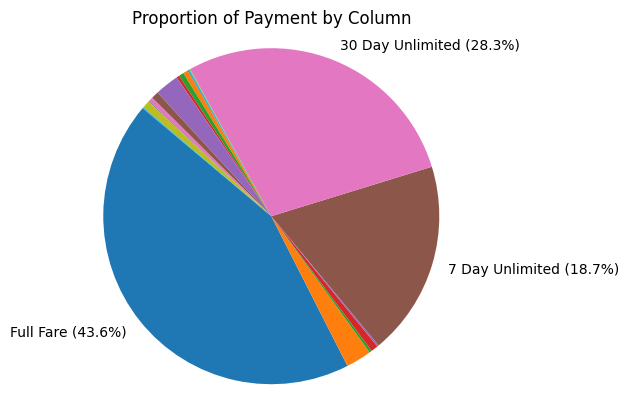

In [62]:
import matplotlib.pyplot as plt

# Calculate the sum of payments for each column
df_column_sums = df.iloc[:, 4:].sum()

# Calculate the total sum of all payments
total_payment = df_column_sums.sum()

# Calculate the proportion of payments for each column
proportions = df_column_sums / total_payment
proportions = proportions.fillna(0)

# Create labels for all columns
labels = proportions.index


# Create a pie chart
plt.pie(proportions, labels=[f'{label} ({prop*100:.1f}%)' if prop >= 0.1 else '' for label, prop in zip(labels, proportions)], startangle=140)
plt.title('Proportion of Payment by Column')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

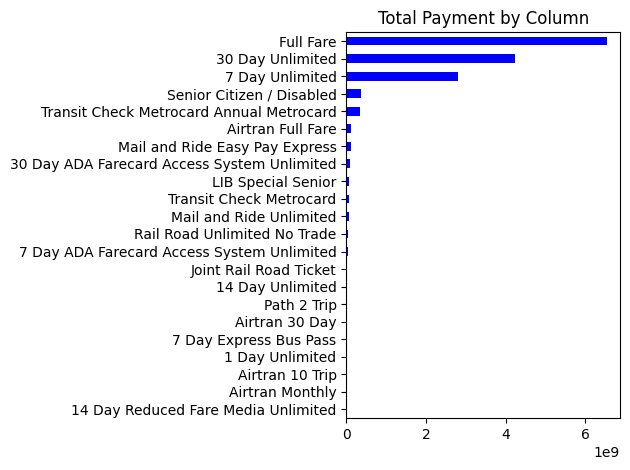

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

df_by_payment = df.iloc[:, 4:-1].sum().sort_values(ascending=True)


df_by_payment.plot(kind='barh', color='blue')
plt.title('Total Payment by Column')
plt.tight_layout()

plt.show()

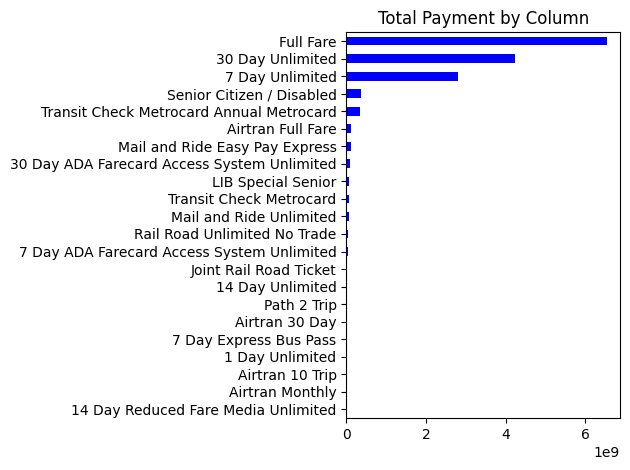